1. Setup and Load Data

1.1 Install Dependencies and Setup

In [126]:
import tensorflow as tf 
import os

data_dir = "data"  # đổi theo đường dẫn dataset của bạn

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file == ".DS_Store":   # gặp .DS_Store thì bỏ qua
            continue
        file_path = os.path.join(root, file)
        # xử lý ảnh ở đây...
        print("Found image:", file_path)


Found image: data/WaterPollution/image (18).jpeg
Found image: data/WaterPollution/images (2).jpeg
Found image: data/WaterPollution/hochiminh-suongmu_2158452.jpg
Found image: data/WaterPollution/image (5).png
Found image: data/WaterPollution/o-nhiem-nguon-nuoc-o-viet-nam.jpg
Found image: data/WaterPollution/O-nhiem-moi-truong-nuoc-dang-la-van-de-nan-giai-hien-nay.jpg
Found image: data/WaterPollution/01-thuc-trang-o-nhiem-moi-truong-2024.jpg
Found image: data/WaterPollution/o-nhiem-moi-truong.png
Found image: data/WaterPollution/image (9).png
Found image: data/WaterPollution/shutterstock318885746-1661915084445605981345.jpg
Found image: data/WaterPollution/p_2x_6ab3ae91cfe4.png
Found image: data/WaterPollution/images (4).jpeg
Found image: data/WaterPollution/image (8).png
Found image: data/WaterPollution/images.jpeg
Found image: data/WaterPollution/o-nhiem-nuoc-tp-hcm_.jpg
Found image: data/WaterPollution/thuc-trang-o-nhim-moi-truong-o-viet-nam-e1538037834393-1280x.jpg
Found image: data/W

In [127]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [128]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [129]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

1.2 Remove dodgy image

In [130]:
import cv2
import filetype  
from matplotlib import pyplot as plt


In [131]:
data_dir = "data"

In [132]:
os.listdir(os.path.join(data_dir, "WaterPollution"))

['image (18).jpeg',
 'images (2).jpeg',
 'hochiminh-suongmu_2158452.jpg',
 'image (5).png',
 'o-nhiem-nguon-nuoc-o-viet-nam.jpg',
 'O-nhiem-moi-truong-nuoc-dang-la-van-de-nan-giai-hien-nay.jpg',
 '01-thuc-trang-o-nhiem-moi-truong-2024.jpg',
 'o-nhiem-moi-truong.png',
 'image (9).png',
 'shutterstock318885746-1661915084445605981345.jpg',
 'p_2x_6ab3ae91cfe4.png',
 'images (4).jpeg',
 'image (8).png',
 'images.jpeg',
 'o-nhiem-nuoc-tp-hcm_.jpg',
 'thuc-trang-o-nhim-moi-truong-o-viet-nam-e1538037834393-1280x.jpg',
 'o-nhiem-moi-truong-1024x621.jpg',
 'image (4).png',
 'thuc-trang-o-nhiem-moi-truong-nuoc-o-viet-nam.jpg',
 'image (8).jpeg',
 'image (21).jpeg',
 'AF2bZygzKRE7NRaN0W2PScpaRYRQX5elkvrM668WVIgcxT9euiY-s32-c-mo.jpeg',
 '1709_thuc-trang-o-nhiem-nguon-nuoc-tren-the-gioi-va-o-viet-n.jpg',
 'images (1).jpeg',
 'o-nhiem-kenh-rach-tp-hcm_.jpg',
 'p_1x_047c49179e48.png',
 'image (19).jpeg',
 'images (3).jpeg',
 'vung-o-nhiem.jpg',
 'thuc-trang-oi-nhiem-nuoc-tai-viet-nam.jpg',
 'image (3

In [133]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [134]:
img = cv2.imread(os.path.join(data_dir, "WaterPollution", "image_000.jpg"))

[ WARN:0@6187.286] global loadsave.cpp:275 findDecoder imread_('data/WaterPollution/image_000.jpg'): can't open/read file: check file path/integrity


In [135]:
import cv2, os, filetype

data_dir = "data"
image_exts = ['jpeg','jpg','png']

for image_class in os.listdir(data_dir):
    

    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue

    for image in os.listdir(class_path):
       

        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = filetype.guess(image_path)   # dùng guess thay vì what
            if tip is None or tip.extension not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            if os.path.isfile(image_path):
                os.remove(image_path)


1.3 Load Data

In [136]:
tf.data.Dataset 


tensorflow.python.data.ops.dataset_ops.DatasetV2

In [137]:
import numpy as np
from matplotlib import pyplot as plt

In [138]:
data = tf.keras.utils.image_dataset_from_directory(
    "data", image_size=(224,224), batch_size=32
)
data_iterator = data.as_numpy_iterator()


Found 218 files belonging to 2 classes.


In [139]:
##data_iterator = data.as_numpy_iterator()

In [140]:
batch =data_iterator.next()

In [141]:
scaled = batch[0] / 255

In [142]:
scaled.max()

np.float32(1.0)

In [143]:
# Class 1 =  WaterPollution
# Class 2 = AirPollution
batch[1] 

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

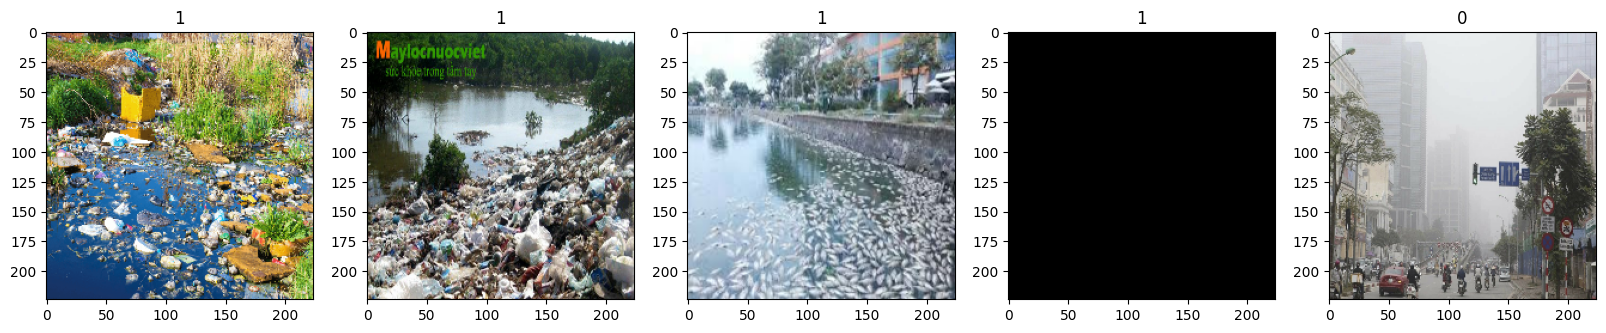

In [144]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##

 # 2. Preprocess Data 


2.1 Scale Data

In [145]:
 data = data.map(lambda x,y: (x/255, y))


In [146]:
scaled_iterator = data.as_numpy_iterator()

In [147]:
batch = scaled_iterator.next()

In [148]:
batch[0].min()

np.float32(0.0)

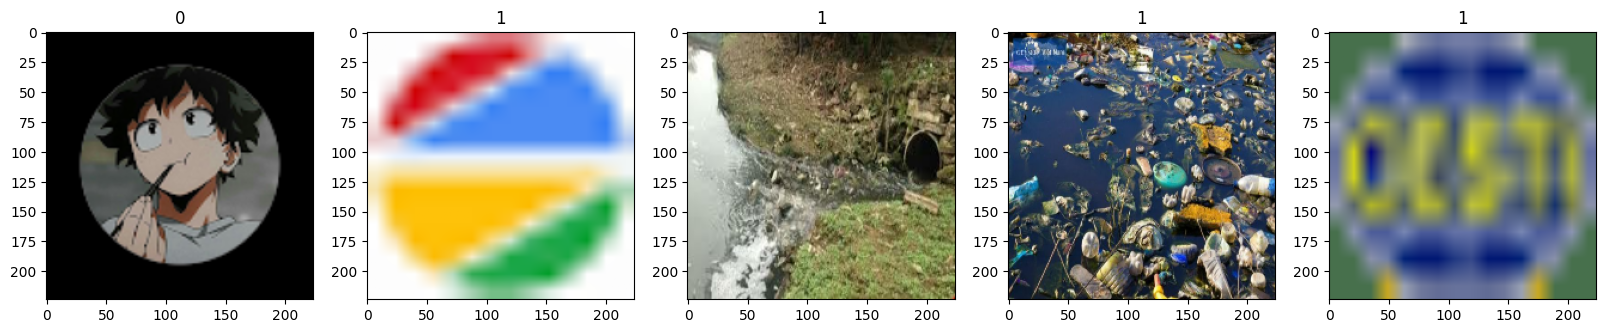

In [149]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [150]:
len(data)

7

In [151]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [152]:
train_size+val_size+test_size

7

In [153]:
train =data.take(train_size)
val = data.skip(train_size).take(val_size)
test =data.skip(train_size+val_size).take(test_size)

In [154]:
len(test)

1

# 3.Deep Model

3.1 Build Deep Learning Model 


In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [156]:
model = Sequential()

In [157]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.MaxPooling2D", "keras.layers.MaxPool2D"])
class MaxPooling2D(BasePooling):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output when using the `"valid"` padding option has a spatial
    shape (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    Args:
        pool_size: int or tuple of 2 integers

In [158]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/airm1/Desktop/WORKSPACE/Vision_Computing/Demo_CNN/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train


In [161]:
logdir='logs'

In [162]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [163]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.4922 - loss: 1.4957 - val_accuracy: 0.3906 - val_loss: 1.2679
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.5156 - loss: 0.7973 - val_accuracy: 0.7188 - val_loss: 0.6636
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.6250 - loss: 0.6677 - val_accuracy: 0.6719 - val_loss: 0.6539
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.6484 - loss: 0.6536 - val_accuracy: 0.7500 - val_loss: 0.5959
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.7031 - loss: 0.6239 - val_accuracy: 0.8594 - val_loss: 0.5079
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.7188 - loss: 0.5875 - val_accuracy: 0.7969 - val_loss: 0.5422
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.8203 - loss: 0.5268 - val_accuracy: 0.8281 - val_loss: 0.4504
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.7578 - loss: 0.5112 - val_accuracy: 0.7656 - val_loss:

In [164]:
hist.history

{'accuracy': [0.4921875,
  0.515625,
  0.625,
  0.6484375,
  0.703125,
  0.71875,
  0.8203125,
  0.7578125,
  0.8203125,
  0.8046875,
  0.8125,
  0.8359375,
  0.859375,
  0.8046875,
  0.8359375,
  0.875,
  0.8828125,
  0.8828125,
  0.8984375,
  0.890625],
 'loss': [1.4957290887832642,
  0.7973085045814514,
  0.6677002906799316,
  0.6536418795585632,
  0.6239193677902222,
  0.587514340877533,
  0.5267689824104309,
  0.5112419724464417,
  0.43615928292274475,
  0.40497887134552,
  0.4001884460449219,
  0.4330483078956604,
  0.33866214752197266,
  0.42803823947906494,
  0.3847979009151459,
  0.2862992286682129,
  0.28958988189697266,
  0.2904758155345917,
  0.2561118006706238,
  0.2708538770675659],
 'val_accuracy': [0.390625,
  0.71875,
  0.671875,
  0.75,
  0.859375,
  0.796875,
  0.828125,
  0.765625,
  0.78125,
  0.8125,
  0.84375,
  0.875,
  0.765625,
  0.84375,
  0.859375,
  0.90625,
  0.828125,
  0.828125,
  0.875,
  0.890625],
 'val_loss': [1.267913579940796,
  0.6635980606079102,

3.3 Plot Performance 


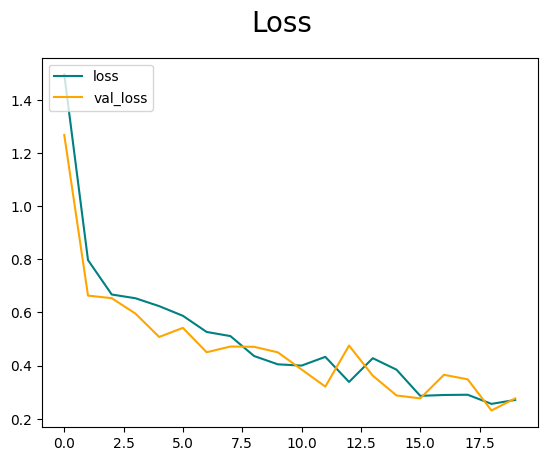

In [165]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

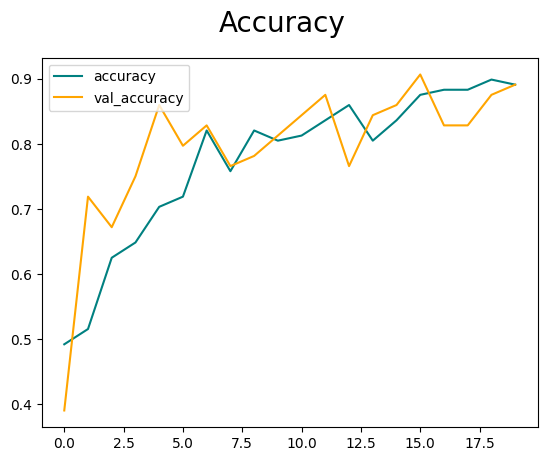

In [166]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

4.1 Evaluate


In [167]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [168]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [169]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2025-09-22 23:59:09.217501: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [170]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7857142686843872, Recall: 0.9166666865348816, Accuracy: 0.8461538553237915


4.2 Test

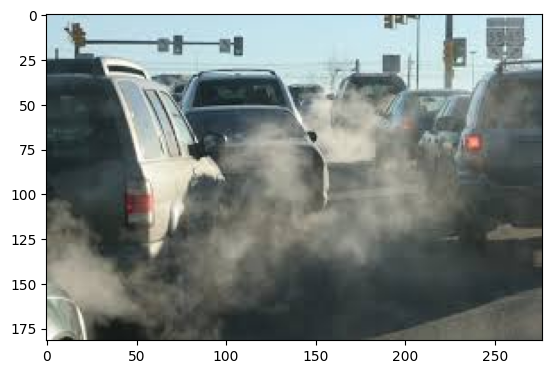

In [171]:
img = cv2.imread('airpollutiontest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

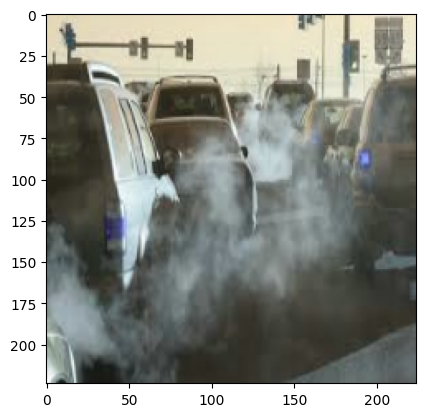

In [172]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [173]:
np.expand_dims(resize, axis=0).shape

(1, 224, 224, 3)

In [174]:
ywhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [175]:
ywhat

array([[0.92216015]], dtype=float32)

In [176]:
if ywhat > 0.5:
    print(f'Predicted class is Air Pollution')
else:
    print(f'Predicted class is Water Pollution')

Predicted class is Air Pollution


# 5.SAVE THE MODEL

5.1 Save the Model

In [177]:
from tensorflow.keras.models import load_model

In [178]:
model.save(os.path.join('models','CNN_Testing.h5'))

In [179]:
new_model = load_model(os.path.join('models','CNN_Testing.h5'))

In [180]:
new_model 

<Sequential name=sequential_2, built=True>